LE QUERNEC Loévan, LEYRIS Anouk, MARTIN Jena-Baptiste, BORNET Joshua, FERREIRA Louise, CDOF2

# Decentralization Technologies: TD 3

In [197]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Q1: Develop diverse predictive models targeting the selected dataset, each group member should create a distinct model

We're going to use the titanic dataset to predict the survival of passengers (by seaborn). We will use the following models:
- KNeighborsClassifier;
- SVC;
- DecisionTreeClassifier;
- RandomForestClassifier;
- GradientBoostingClassifier.

In [198]:
# import the data
df = sns.load_dataset('titanic')

In [199]:
# print all the columns when using head()
pd.set_option('display.max_columns', None)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [200]:
# number of line(s) and column(s)
df.shape

(891, 15)

In [201]:
# brief summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


We see that the column `deck` has a lot of missing values, so we will drop it. For the column `age`, we will fill the missing values with the mean of the column. And for the missing values in the columns `embarked` and `embark_town`, we will simply drop the rows.

In [202]:
# drop the column 'deck'
df = df.drop('deck', axis=1)

In [203]:
# replace the missing values in the column 'age' by the mean
df['age'] = df['age'].fillna(df['age'].mean())

In [204]:
# drop the missing values in the columns 'embarked' and 'embark_town'
df = df.dropna(subset=['embarked', 'embark_town'])

In [205]:
# check the missing values
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [206]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


Let's clean a little bit more by dropping the useless columns. The columns that we will drop are:
- `who`: we already have the column `sex`;
- `adult_male`: we already have the column `sex`;
- `alive`: we already have the column `survived`.

In [207]:
# drop the useless columns
df = df.drop(['who', 'adult_male', 'alive'], axis=1)

In [208]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,True


Now, we will plot the correlation matrix to see which features are the most correlated with the target variable `survived`.

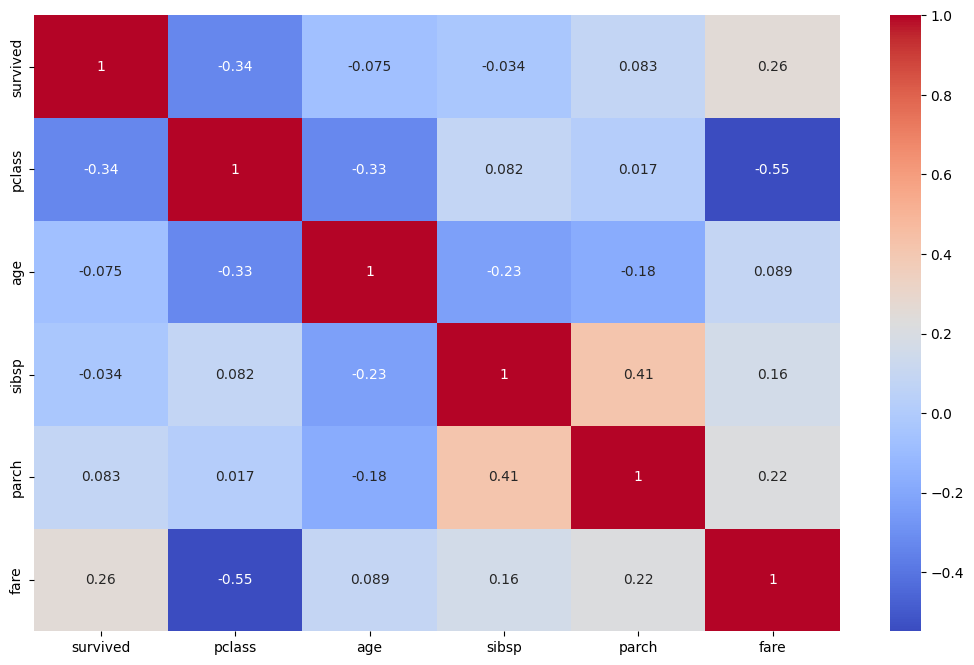

In [209]:
# select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# plot the correlation matrix
plt.figure(figsize=(13, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

Let's start the machine learning part, by importing the necessary libraries.

In [210]:
from sklearn.model_selection import train_test_split

# import the scaler
from sklearn.preprocessing import StandardScaler

# import the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# import the metrics
from sklearn.metrics import accuracy_score, confusion_matrix

Then, we need to encode the categorical variables. We will use the pandas method `get_dummies` to do so.

In [211]:
# encode the categorical columns
df = pd.get_dummies(df, drop_first=True)

# replace false values by 0 and true values by 1
df = df.replace(False, 0)
df = df.replace(True, 1)

# make sure there is no missing value in the whole dataframe
df.dropna(inplace=True)

In [212]:
df.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,1,0,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0,1


In [213]:
# save the dataframe to a csv file
df.to_csv('titanic_cleaned.csv', index=False)

Here, we define some functions that we will use later, and may be really useful.

First, we define two new variables:
- `X`: the features;
- `Y`: the target.

In [214]:
# split the dataframe into two variables
X = df.drop(columns=['survived']) # features
Y = df['survived'] # target

In [215]:
X.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,3,22.0,1,0,7.2500,0,1,0,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,1,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,1,0,0,0,1
4,3,35.0,0,0,8.0500,1,1,0,1,0,1,0,1


In [216]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

Now we split the data into training and testing sets using `train_test_split`. We use 80% of the data for training and 20% for testing.

In [217]:
# split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # use 20% of the data for testing

Here, we define a function that will be useful to evaluate a classification model. It will return the accuracy score and the confusion matrix.

In [218]:
# function to evaluate a regression model
def evaluate_classification_model(model):
    # fit the model
    fitted_model = model.fit(X_train, Y_train)

    # predict the target
    Y_pred = fitted_model.predict(X_test)

    # calculate the metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    confusion = confusion_matrix(Y_test, Y_pred)

    return fitted_model, Y_pred, accuracy, confusion

# function to print the regression results
def print_classification_results(accuracy, confusion):
    print(f"Accuracy: {accuracy}")
    print(f"Confusion matrix: {confusion}")

We're going to use these different models to predict the survival of passengers for our API since it has the best accuracy score. Let's save the models using the `joblib` library each time we train a model.

In [219]:
# import the joblib library
import joblib

### KNeighborsClassifier

In [220]:
# evaluate the model
fitted_model, Y_pred, accuracy, confusion = evaluate_classification_model(KNeighborsClassifier())

# print the results
print_classification_results(accuracy, confusion)

Accuracy: 0.6966292134831461
Confusion matrix: [[90 19]
 [35 34]]


In [221]:
# save the model
joblib.dump(fitted_model, 'knn_model.pkl')

['knn_model.pkl']

### SVC

In [222]:
# evaluate the model
fitted_model, Y_pred, accuracy, confusion = evaluate_classification_model(SVC())

# print the results
print_classification_results(accuracy, confusion)

Accuracy: 0.6853932584269663
Confusion matrix: [[100   9]
 [ 47  22]]


In [223]:
# save the model
joblib.dump(fitted_model, 'svc_model.pkl')

['svc_model.pkl']

### DecisionTreeClassifier

In [224]:
# evaluate the model
fitted_model, Y_pred, accuracy, confusion = evaluate_classification_model(DecisionTreeClassifier())

# print the results
print_classification_results(accuracy, confusion)

Accuracy: 0.7528089887640449
Confusion matrix: [[81 28]
 [16 53]]


In [225]:
# save the model
joblib.dump(fitted_model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

### RandomForestClassifier

In [226]:
# evaluate the model
fitted_model, Y_pred, accuracy, confusion = evaluate_classification_model(RandomForestClassifier())

# print the results
print_classification_results(accuracy, confusion)

Accuracy: 0.7415730337078652
Confusion matrix: [[81 28]
 [18 51]]


In [227]:
# save the model
joblib.dump(fitted_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

### GradientBoostingClassifier

In [228]:
# evaluate the model
fitted_model, Y_pred, accuracy, confusion = evaluate_classification_model(GradientBoostingClassifier())

# print the results
print_classification_results(accuracy, confusion)

Accuracy: 0.8146067415730337
Confusion matrix: [[93 16]
 [17 52]]


In [229]:
# save the model
joblib.dump(fitted_model, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']